Add your import statements and the database connection statements in the below code block

Database file path = '/course/data/CSE-578/dinofunworld.db'

In [1]:
#your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_filename =  '/course/data/CSE-578/dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()


**Question 1 :** 

Make a Pie Chart of the visits to Thrill Ride attractions.

**Note:** 
* For this question, display the pie chart in the notebook and print the data used to create the pie chart as a list of lists (ex: [['Ride 1', 10], ['Ride 2', 100], ...])
* The pie chart must have the below mentioned parameters,
    * labels
    * title named '**Visits to Thrill Ride attractions**'
    * label with one decimal value inside wedges
    * set aspect ratio of the plot to 'equal'.
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels


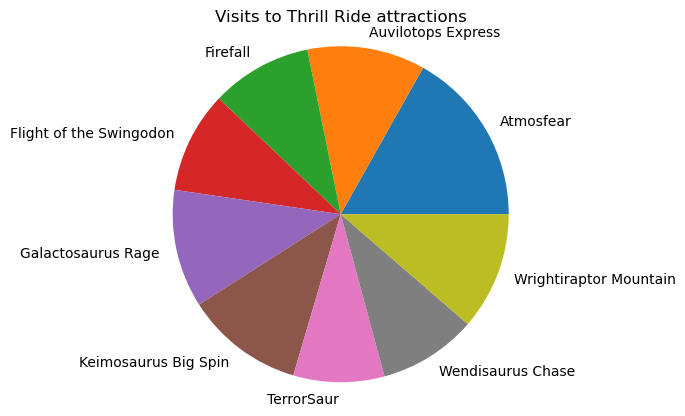

[['Atmosfear', 27747], ['Auvilotops Express', 18694], ['Firefall', 16024], ['Flight of the Swingodon', 16093], ['Galactosaurus Rage', 18717], ['Keimosaurus Big Spin', 18792], ['TerrorSaur', 14415], ['Wendisaurus Chase', 15577], ['Wrightiraptor Mountain', 18700]]


In [2]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
c.execute('''SELECT a.name, count(*) 
            FROM checkin c
            inner join attraction a on c.attraction=a.AttractionID
            where lower(a.category) like '%thrill ride%'
            group by 1
            ''')
counts = c.fetchall()
all_data = []
values = []
labels = []
for item in counts:  #thrill rides and no of visitors
    all_data.append(list(item))
    labels.append(item[0])
    values.append(item[1])
    
    
plt.pie(values, labels=labels)
plt.axis('equal')
plt.title('Visits to Thrill Ride attractions')
plt.show()
print(all_data)

**Question 2 :** 

Make a bar chart of total visits to food stalls.

**Note:** 
* Please query attractions with category equal to "Food" and order by number of visits.
* For this question, display the bar chart in the notebook and print the data used to create the bar chart as a list of lists (ex: [['Stall 1', 10], ['Stall 2', 50], ...])
* The bar chart should be a **vertical bar plot** and must have the specified parameters listed below,
  * Set x-axis to food stalls, labeling each food stall with names rotated at a 45-degree angle and right horizontal alignment. Set y-axis to number of visits.
  * x-label ('**Food Stalls**') and y-label ('**Number of Visits**')
  * title named '**Total Visits to Food Stalls**'
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels


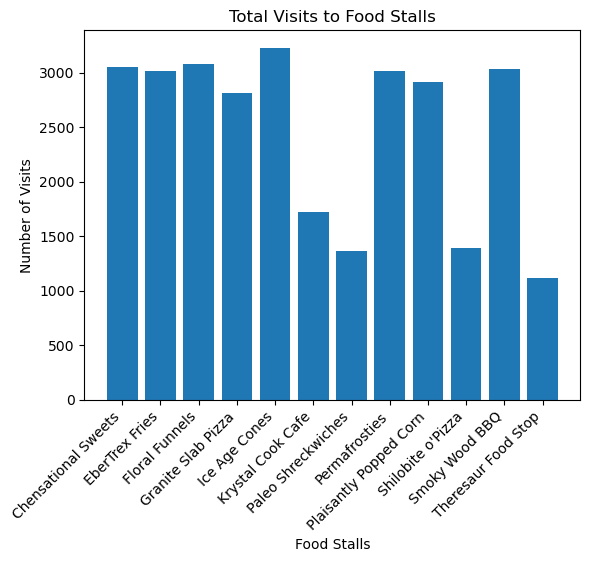

[['Chensational Sweets', 3049], ['EberTrex Fries', 3018], ['Floral Funnels', 3083], ['Granite Slab Pizza', 2810], ['Ice Age Cones', 3228], ['Krystal Cook Cafe', 1725], ['Paleo Shreckwiches', 1361], ['Permafrosties', 3018], ['Plaisantly Popped Corn', 2914], ["Shilobite o'Pizza", 1393], ['Smoky Wood BBQ', 3037], ['Theresaur Food Stop', 1116]]


In [3]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here

all_data = []
labels = []
values = []

c.execute('''SELECT a.name, count(*) 
            FROM checkin c
            inner join attraction a on c.attraction=a.AttractionID
            where lower(a.category) like '%food%'
            group by 1
            ''')
counts = c.fetchall()

for item in counts:
    all_data.append(list(item))
    labels.append(item[0])
    values.append(item[1])

# Plotting
plt.bar(range(len(values)), values)
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.xlabel('Food Stalls')
plt.ylabel('Number of Visits')
plt.title('Total Visits to Food Stalls')
plt.show()

print(all_data)

**Question 3 :** 

Make a line chart of attendance at Atmosfear every five minutes.

**Note:** 
* For this question, use data from the table "sequences". You can assume that all activity sequences are aligned by time (i.e., the first node of all sequences occurred at the same time) and are of the same length.
* You only need to consider the first 16 hours of records in the sequences, which is considered the open hours of the park in one day. Specifically, because an activity sequence from the "sequences" table was updated/recorded every 5 minutes, you need to extract the first 192 items (16h * 60m / 5m = 192).
* Display the line chart in the notebook and print the data used to create the chart as a list of lists or tuple lists 
    * The first item in the list is irrelevant, but you can put in some meaningful information and it should be integer.The second item is the count of visits at that moment. For example, your output should look like this (in Python syntax; not relevant to the correct answer): [ (0, 0), (1, 7), (2, 3), …, (190, 4), (191, 5) ].
* The line chart must have the specified parameters listed below,
  * Set x-axis to the first element in your output list and y-axis to the second item in the list (number of visits)  
  * x-label ('**Time in minutes**') and y-label ('**Number of visits**')
  * title named '**Attendance at Atmosfear every 5 minutes**'
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

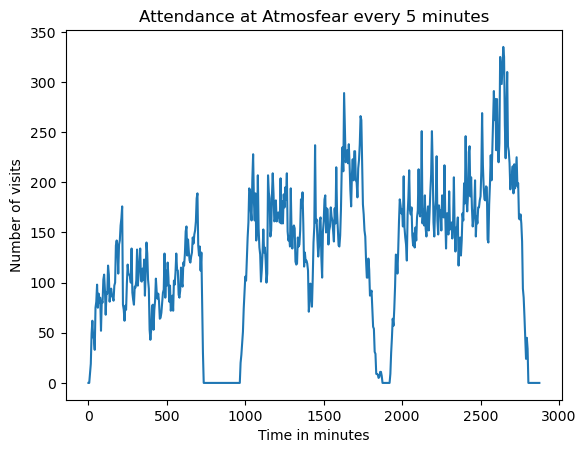

[[0, 0], [1, 0], [2, 9], [3, 19], [4, 49], [5, 62], [6, 46], [7, 44], [8, 33], [9, 75], [10, 81], [11, 98], [12, 75], [13, 89], [14, 80], [15, 85], [16, 52], [17, 82], [18, 80], [19, 103], [20, 108], [21, 93], [22, 68], [23, 90], [24, 89], [25, 117], [26, 108], [27, 81], [28, 89], [29, 94], [30, 87], [31, 85], [32, 82], [33, 97], [34, 100], [35, 137], [36, 142], [37, 134], [38, 109], [39, 138], [40, 142], [41, 157], [42, 164], [43, 176], [44, 78], [45, 73], [46, 62], [47, 77], [48, 73], [49, 99], [50, 118], [51, 109], [52, 108], [53, 106], [54, 100], [55, 134], [56, 90], [57, 83], [58, 78], [59, 96], [60, 95], [61, 102], [62, 133], [63, 97], [64, 110], [65, 121], [66, 134], [67, 102], [68, 101], [69, 114], [70, 103], [71, 123], [72, 87], [73, 111], [74, 140], [75, 129], [76, 103], [77, 94], [78, 53], [79, 43], [80, 53], [81, 76], [82, 78], [83, 53], [84, 73], [85, 82], [86, 104], [87, 91], [88, 84], [89, 89], [90, 81], [91, 64], [92, 65], [93, 70], [94, 80], [95, 90], [96, 93], [97, 12

In [15]:
### TEST FUNCTION: test_question3
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here

import numpy as np

# get all visitors who visited Atmosfear
c.execute("SELECT visitorID, sequence FROM sequences where sequence LIKE '%8%';")
sequences = c.fetchall()

# df that collects how many 5min time frames a visitor has been in Atmosfear
sequence_stats = pd.DataFrame.from_records(sequences, columns=['visitor', 'sequence'])
sequence_stats['sequence_list'] = sequence_stats['sequence'] \
.apply(lambda s: [1 if x == '8' else 0 for x in s.split("-")])
attendance = np.sum(sequence_stats['sequence_list'].values.tolist(), axis=0)

x_axis_list = range(0, len(attendance)*5, 5)
plt.plot(x_axis_list, attendance)
plt.ylabel('Number of visits')
plt.xlabel('Time in minutes')
plt.title('Attendance at Atmosfear every 5 minutes')
plt.show()
result = [[i, attendance[i]] for i in range(192)]
print(result)


In [9]:
x_axis_list

range(0, 2880, 5)


**Question 4:**

Make a box plot of total visits to rides in the Kiddie Rides category.

**Note:** 
* The to-be-printed data list must be ordered by AttractionID (a field in the table "attraction").
* For this question, display the box plot in the notebook and print the number of visits to each ride as a list (ex: [3, 4, 5, 6, ...])
* The boxplot chart must have the specified parameters listed below,
  * Set x-axis to Attraction and y-axis to number of visits to each ride.   
  * x-label ('**Attraction**') and y-label ('**Visitor Count**')
  * title named '**Total visits to rides in the Kiddie Rides category**'
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

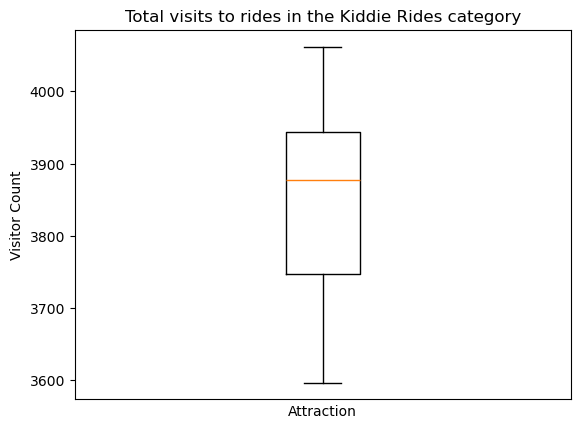

[3963, 3922, 3747, 3747, 3640, 3759, 3597, 4062, 3925, 3877, 4022]


In [7]:
### TEST FUNCTION: test_question4
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
c.execute("SELECT attraction.name, count(*) FROM checkin, attraction WHERE checkin.attraction = attraction.attractionid AND LOWER(category) LIKE '%kiddie rides%' GROUP BY attraction.name")
values = []
for item in c.fetchall():
    values.append(item[1])

plt.boxplot(values)
plt.xticks([])
plt.title('Total visits to rides in the Kiddie Rides category')
plt.xlabel('Attraction')
plt.ylabel('Visitor Count')
plt.show()
print(values)